In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # predictive modeling with nice outputs
import numpy as np 
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

In [2]:
birthweight = pd.read_excel('birthweight_low.xlsx')

In [3]:
birthweight.head(10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [4]:
#Checking Null Values 
birthweight[birthweight.isna().any(axis=1)] 

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
73,47,15.0,2,NaN,39,17.0,9,9,19,7,1,0,0,1,0,0,1,3170
74,42,13.0,7,11.0,26,NaN,9,9,2,4,1,0,1,0,1,0,0,3170
99,51,17.0,6,8.0,38,NaN,8,9,17,6,0,0,1,0,0,0,1,3459
111,38,NaN,1,NaN,34,17.0,7,9,11,7,1,0,0,1,0,0,1,3610
114,43,NaN,1,9.0,36,NaN,8,9,5,8,1,0,0,1,0,0,1,3620
153,37,12.0,8,5.0,40,NaN,7,9,4,0,1,0,1,0,0,0,1,3799
164,36,12.0,3,6.0,31,NaN,7,9,16,2,0,0,1,0,0,0,1,3900
185,38,12.0,2,NaN,32,14.0,9,9,13,0,1,0,1,0,0,1,0,4210
191,30,12.0,5,12.0,38,NaN,5,7,3,2,1,0,1,0,0,0,1,4610


In [5]:
# looping to detect features with missing values
for col in birthweight:

    # creating columns with 1s if missing and 0 if not
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birthweight[    ['m_meduc', 'm_npvis',
                 'm_feduc']    ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [6]:
# median of values in the same column
birthweight['meduc'].fillna(value=birthweight['meduc'].median(), inplace=True)

# Replace NaNs in column npvis with the
# median of values in the same column
birthweight['npvis'].fillna(value=birthweight['npvis'].median(), inplace=True)

# Replace NaNs in column npvis with the
# median of values in the same column
birthweight['feduc'].fillna(value=birthweight['feduc'].median(), inplace=True)



In [7]:
birthweight.isnull().any().any()
birthweight

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,14.0,5,2.0,62,14.0,4,7,23,9,...,0,1,0,0,1,0,697,1,0,1
1,68,12.0,3,10.0,61,11.0,4,6,25,11,...,1,0,0,1,0,0,1290,0,0,0
2,71,12.0,3,6.0,46,12.0,2,7,21,12,...,0,1,0,0,1,0,1490,0,0,0
3,59,16.0,1,8.0,48,16.0,7,8,21,10,...,0,0,1,0,0,1,1720,0,0,0
4,48,12.0,4,6.0,39,12.0,2,9,17,13,...,1,0,0,1,0,0,1956,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,30,12.0,5,12.0,38,14.0,5,7,3,2,...,0,1,0,0,0,1,4610,0,0,1
192,41,14.0,2,12.0,47,16.0,8,9,10,4,...,0,1,0,0,1,0,4660,0,0,0
193,33,15.0,2,15.0,38,13.0,8,8,0,1,...,1,0,0,1,0,0,4678,0,0,0
194,31,17.0,2,6.0,43,14.0,9,10,8,4,...,0,1,0,0,1,0,4791,0,0,0


In [8]:
birthweight.isnull().any().any()

False

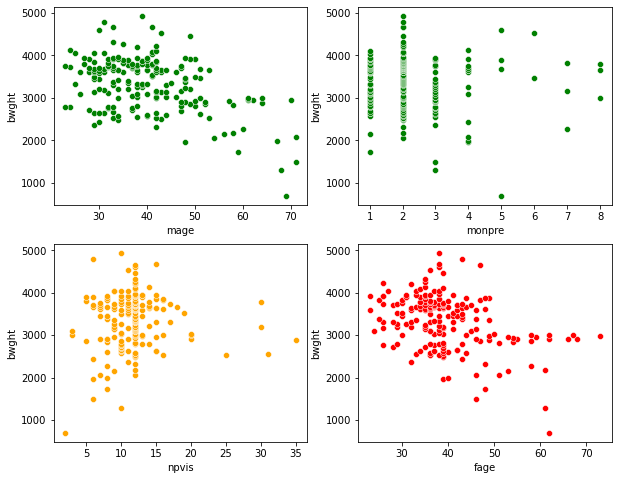

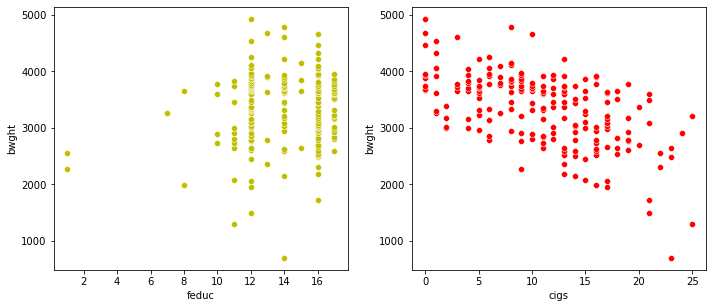

In [9]:
# Visual EDA (Scatterplots)
 
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweight['mage'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'mage')
plt.ylabel(ylabel = 'bwght')

########################

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweight['monpre'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'monpre')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birthweight['npvis'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'npvis')
plt.ylabel(ylabel = 'bwght')


########################

# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birthweight['fage'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'fage')
plt.ylabel(ylabel = 'bwght')

########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = birthweight['feduc'],
                y = birthweight['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'feduc')
plt.ylabel(ylabel = 'bwght')


###################

# developing a scatterplot
plt.subplot(3, 2, 6)
sns.scatterplot(x = birthweight['cigs'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'cigs')
plt.ylabel(ylabel = 'bwght')


########################
# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

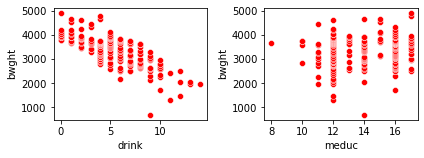

In [10]:
# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweight['drink'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'drink')
plt.ylabel(ylabel = 'bwght')

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweight['meduc'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'meduc')
plt.ylabel(ylabel = 'bwght')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

In [11]:
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc'],
      dtype='object')

In [12]:
# preparing explanatory variable data
birthweight_data   =birthweight .drop(['bwght'],
                               axis = 1)


# preparing response variables
birthweight_target = birthweight.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 20)
y-side: (147,)


Testing Data
------------
X-side: (49, 20)
y-side: (49,)



In [13]:
# merging X_train and y_train so that they can be used in statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)

In [14]:
# Step 1: build a model
lm_best = smf.ols(formula =  """ bwght ~ mage+
                                         cigs+
                                         drink+
                                         fmaps""",
                                data = df_train)

# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     91.85
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           2.13e-38
Time:                        00:24:50   Log-Likelihood:                -1070.8
No. Observations:                 147   AIC:                             2152.
Df Residuals:                     142   BIC:                             2166.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4119.2223    470.230      8.760      0.0

In [15]:
# log transforming mage and saving it to the dataset
birthweight['log_mage'] = np.log(birthweight['mage'])

In [16]:
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'log_mage'],
      dtype='object')

In [17]:
x_variables=['log_mage',
       'cigs', 'drink', 'fage']

In [18]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
birthweight_ols_data   = birthweight.loc[ : , x_variables]


# Preparing the target variable
birthweight_target = birthweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_ols_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            birthweight_ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# Linear regression

In [19]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4) 

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7046
OLS Testing Score  : 0.6594
OLS Train-Test Gap : 0.0452


# Lasso

In [20]:
import sklearn.linear_model # linear models

In [21]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.7039
Lasso Testing Score  : 0.6665
Lasso Train-Test Gap : 0.0452


# ARD

In [22]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.704
Testing Score : 0.6621
ARD Train-Test Gap : 0.0419


# KNN

In [23]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 8)

# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.634
KNN Testing Score : 0.4626
KNN Train-Test Gap: 0.1714


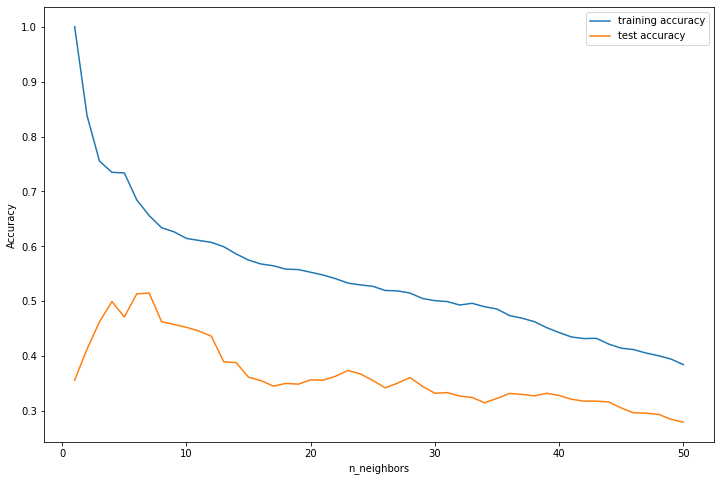

In [24]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [27]:

print(f"""
Model      Train Score      Test Score         Train-Test Gap
-----      -----------      ----------         ------------
*OLS*        {lr_train_score}           {lr_test_score}             {lr_test_gap}
Lasso      {lasso_train_score}           {lasso_test_score}             {lasso_test_gap}
ARD        {ard_train_score}           {ard_test_score}             {ard_test_gap}
KNN        {knn_reg_score_train}            {knn_reg_score_test}             {knn_reg_test_gap}

*OLS is the recommended final model.*
""")




Model      Train Score      Test Score         Train-Test Gap
-----      -----------      ----------         ------------
*OLS*        0.7046           0.6594             0.0452
Lasso      0.7039           0.6665             0.0452
ARD        0.704           0.6621             0.0419
KNN        0.634            0.4626             0.1714

*OLS is the recommended final model.*

